In [161]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Complete Case Analysis

In [162]:
df=pd.read_csv("data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [163]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [164]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

- when we want to do complete case analysis then there should be less that 5% data in that column we can apply this 

In [165]:
columns=[var for var in df.columns if (df[var].isnull().mean()*100 < 5) and (df[var].isnull().mean()*100 >0)]
columns

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [166]:
df[columns].head()


,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [167]:
len(df[columns].dropna())/len(df)

0.8968577095730244

In [168]:
new_df=df[columns].dropna()
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [169]:
df.shape, new_df.shape

((19158, 13), (17182, 5))

<Axes: xlabel='city_development_index', ylabel='Count'>

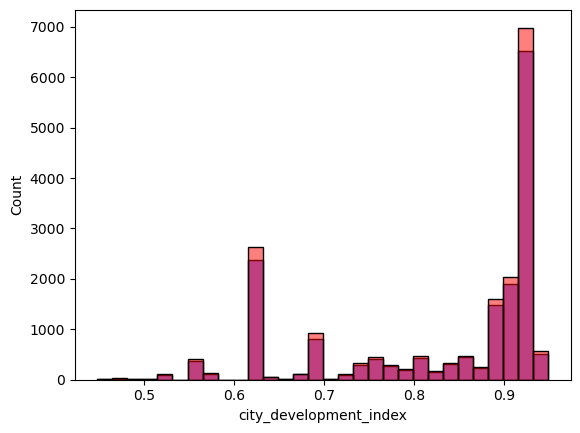

In [170]:
sns.histplot(new_df["city_development_index"],bins=30,color="blue",alpha=0.5)
sns.histplot(df["city_development_index"],bins=30,color="red",alpha=0.5)

<Axes: xlabel='city_development_index', ylabel='Density'>

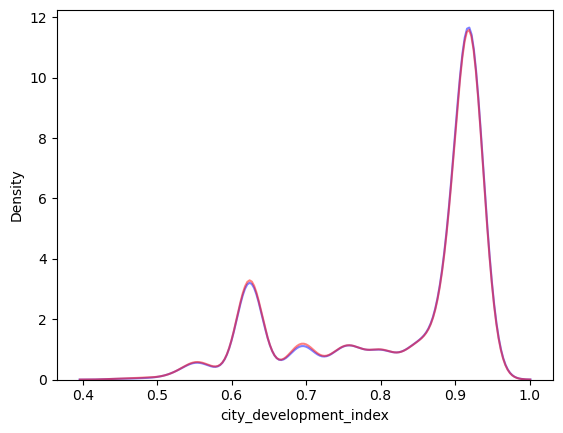

In [171]:
sns.kdeplot(new_df["city_development_index"],color="blue",alpha=0.5)
sns.kdeplot(df["city_development_index"],color="red",alpha=0.5)

<Axes: xlabel='experience', ylabel='Count'>

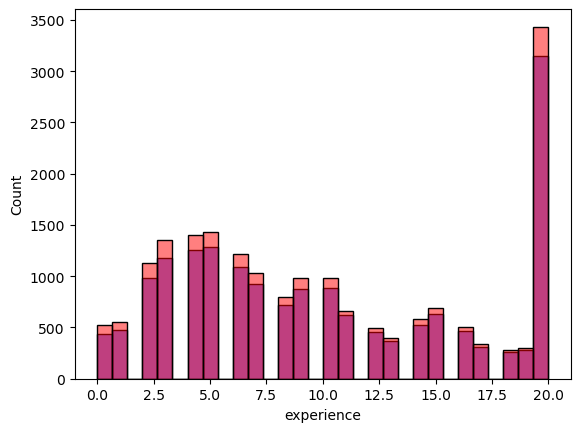

In [172]:
sns.histplot(new_df["experience"],bins=30,color="blue",alpha=0.5)
sns.histplot(df["experience"],bins=30,color="red",alpha=0.5)

<Axes: xlabel='experience', ylabel='Density'>

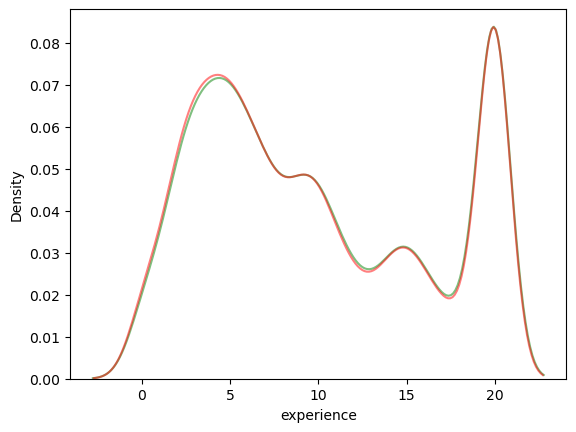

In [173]:
sns.kdeplot(new_df["experience"],color="green",alpha=0.5)
sns.kdeplot(df["experience"],color="red",alpha=0.5)

<Axes: xlabel='training_hours', ylabel='Count'>

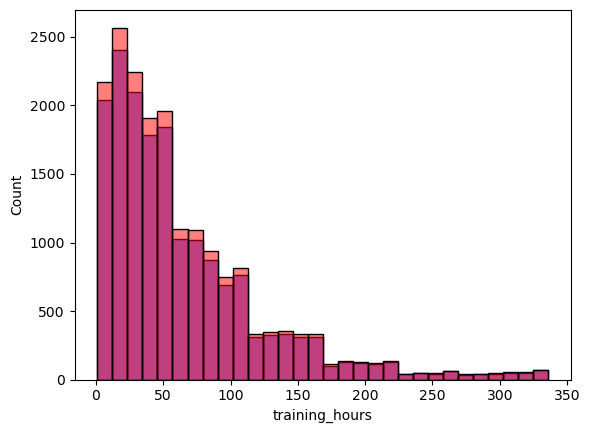

In [174]:
sns.histplot(new_df["training_hours"],bins=30,color="blue",alpha=0.5)
sns.histplot(df["training_hours"],bins=30,color="red",alpha=0.5)

<Axes: xlabel='training_hours', ylabel='Density'>

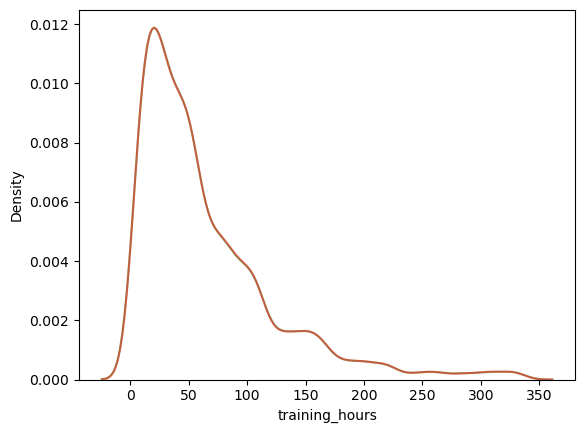

In [175]:
sns.kdeplot(new_df["training_hours"],color="green",alpha=0.5)
sns.kdeplot(df["training_hours"],color="red",alpha=0.5)

- so if we see then the distribution is not change so this is correct

In [176]:
temp=pd.concat([
    df["enrolled_university"].value_counts()/len(df) ,
               
    new_df["enrolled_university"].value_counts()/len(new_df)],axis=1)

In [177]:
temp.columns=["before","after"]

In [178]:
temp

,before,after
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


# numerical

univariate imputation   ,  multivaraite imputation 

### 1) Univariate Imputation 

#### a) Mean/Median

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [180]:
df=pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


- now we will fill the na values with the help of pandas

In [182]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [184]:
x_train.isnull().mean()*100

Age       19.803371
Fare       5.477528
Family     0.000000
dtype: float64

In [185]:
x_train["Age mean"]=x_train["Age"].fillna(x_train["Age"].mean())
x_train["Age median"]=x_train["Age"].fillna(x_train["Age"].median())

x_train["Fare mean"]=x_train["Fare"].fillna(x_train["Fare"].mean())
x_train["Fare median"]=x_train["Fare"].fillna(x_train["Fare"].median())

In [186]:
x_train.sample(5)

,Age,Fare,Family,Age mean,Age median,Fare mean,Fare median
588,22.0,8.0500,0,22.0,22.0,8.050000,8.0500
847,35.0,7.8958,0,35.0,35.0,7.895800,7.8958
292,36.0,12.8750,0,36.0,36.0,12.875000,12.8750
678,43.0,46.9000,7,43.0,43.0,46.900000,46.9000
400,39.0,NaN,0,39.0,39.0,31.885314,14.4542


In [187]:
print("before var of age",x_train["Age"].var())
print("after var of age mean",x_train["Age mean"].var())
print("after var of age median",x_train["Age median"].var())

print("before var of fare",x_train["Fare"].var())
print("after var of fare mean",x_train["Fare mean"].var())
print("after var of fare median",x_train["Fare median"].var())

before var of age 213.7165085187578
after var of age mean 171.33390978297038
after var of age median 171.42222438960798
before var of fare 2574.3526206637193
after var of fare mean 2433.143405184275
after var of fare median 2448.897024777755


In [188]:
x_train.corr()

,Age,Fare,Family,Age mean,Age median,Fare mean,Fare median
Age,1.000000,0.106334,-0.295318,1.000000,1.000000,0.103929,0.103346
Fare,0.106334,1.000000,0.198661,0.101058,0.102921,1.000000,1.000000
Family,-0.295318,0.198661,1.000000,-0.235270,-0.235021,0.196290,0.197721
Age mean,1.000000,0.101058,-0.235270,1.000000,0.999742,0.098800,0.098295
Age median,1.000000,0.102921,-0.235021,0.999742,1.000000,0.100620,0.100062
Fare mean,0.103929,1.000000,0.196290,0.098800,0.100620,1.000000,0.996778
Fare median,0.103346,1.000000,0.197721,0.098295,0.100062,0.996778,1.000000


In [189]:
x_train.cov()

,Age,Fare,Family,Age mean,Age median,Fare mean,Fare median
Age,213.716509,84.480223,-6.393469,213.716509,213.716509,79.571049,79.420930
Fare,84.480223,2574.352621,17.050423,67.493301,68.754981,2574.352621,2574.352621
Family,-6.393469,17.050423,2.770177,-5.125566,-5.121468,16.115167,16.285129
Age mean,213.716509,67.493301,-5.125566,171.333910,171.333910,63.791137,63.670788
Age median,213.716509,68.754981,-5.121468,171.333910,171.422224,64.983611,64.831778
Fare mean,79.571049,2574.352621,16.115167,63.791137,64.983611,2433.143405,2433.143405
Fare median,79.420930,2574.352621,16.285129,63.670788,64.831778,2433.143405,2448.897025


<Axes: xlabel='Age', ylabel='Density'>

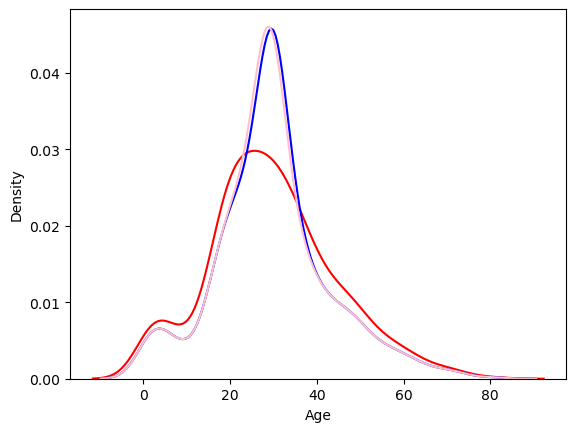

In [190]:
sns.kdeplot(x_train["Age"],color="red")
sns.kdeplot(x_train["Age mean"],color="blue")
sns.kdeplot(x_train["Age median"],color="pink")

<Axes: xlabel='Fare', ylabel='Density'>

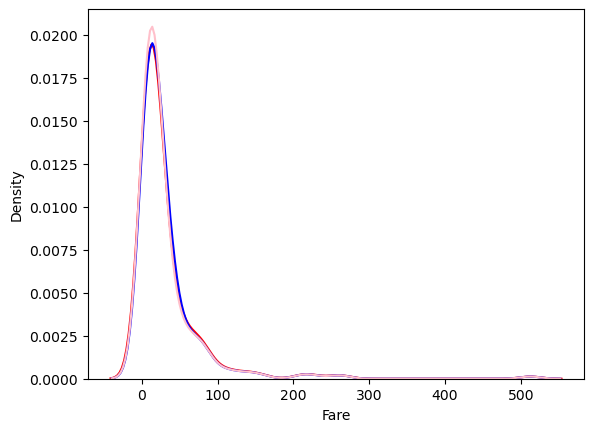

In [191]:
sns.kdeplot(x_train["Fare"],color="red")
sns.kdeplot(x_train["Fare mean"],color="blue")
sns.kdeplot(x_train["Fare median"],color="pink")

<Axes: >

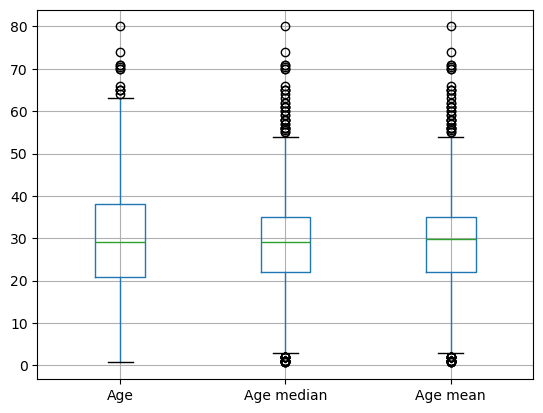

In [192]:
x_train[['Age', 'Age median', 'Age mean']].boxplot()

<Axes: >

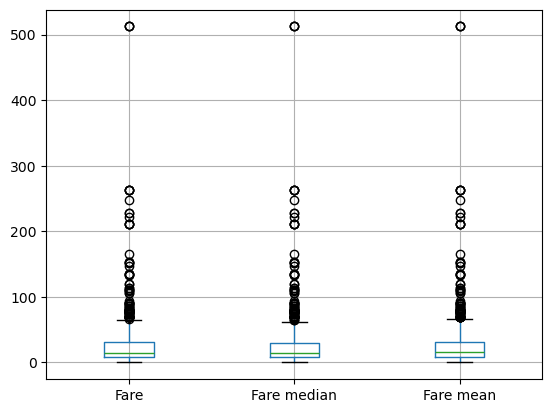

In [193]:
x_train[['Fare', 'Fare median', 'Fare mean']].boxplot()

- now we will use simple imputer class

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [195]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [196]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [198]:
x_train.shape

(712, 3)

In [199]:
x_test.shape

(179, 3)

In [200]:
s1=SimpleImputer(strategy="median")
s2=SimpleImputer(strategy="mean")

In [201]:
trf=ColumnTransformer(transformers=[
    ("trf1",s1,["Age"]),
    ("trf2",s2,["Fare"])
],remainder="passthrough")

In [202]:
x_train_transform=trf.fit_transform(x_train)
x_test_transform=trf.fit_transform(x_test)

In [203]:
x_train_transform

array([[29.    , 15.2458,  2.    ],
       [31.    , 10.5   ,  0.    ],
       [31.    , 37.0042,  2.    ],
       ...,
       [29.    ,  7.7333,  0.    ],
       [36.    , 17.4   ,  1.    ],
       [60.    , 39.    ,  2.    ]], shape=(712, 3))

In [204]:
st=SimpleImputer(strategy="mean")
age_transform=st.fit_transform(x_train["Age"].to_frame())

In [205]:
age_transform

array([[29.74518389],
       [31.        ],
       [31.        ],
       [20.        ],
       [21.        ],
       [45.5       ],
       [22.        ],
       [29.74518389],
       [29.74518389],
       [26.        ],
       [25.        ],
       [21.        ],
       [31.        ],
       [15.        ],
       [29.74518389],
       [29.74518389],
       [65.        ],
       [29.74518389],
       [ 1.        ],
       [34.        ],
       [49.        ],
       [18.        ],
       [29.74518389],
       [70.        ],
       [14.        ],
       [19.        ],
       [30.        ],
       [31.        ],
       [32.        ],
       [16.        ],
       [50.        ],
       [24.        ],
       [56.        ],
       [ 7.        ],
       [ 9.        ],
       [33.        ],
       [19.        ],
       [32.5       ],
       [ 1.        ],
       [45.        ],
       [29.74518389],
       [19.        ],
       [21.        ],
       [ 4.        ],
       [28.        ],
       [17

# Arbitary Value Imputation

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns

In [207]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [209]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Survived"]),df["Survived"],test_size=0.2,random_state=0)

In [210]:
x_train

,Age,Fare,Family
140,NaN,15.2458,2
439,31.0,10.5000,0
817,31.0,37.0042,2
378,20.0,NaN,0
491,21.0,7.2500,0
...,...,...,...
835,39.0,83.1583,2
192,19.0,7.8542,1
629,NaN,7.7333,0
559,36.0,17.4000,1


- with the help of pandas

In [218]:
x_train["Age_99"]=x_train["Age"].fillna(99)
x_train["Age_minus1"]=x_train["Age"].fillna(-1)

x_train["Fare_99"]=x_train["Fare"].fillna(999)
x_train["Fare_minus1"]=x_train["Fare"].fillna(-1)

In [219]:
x_train.head(2)

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
140,NaN,15.2458,2,99.0,-1.0,15.2458,15.2458
439,31.0,10.5000,0,31.0,31.0,10.5000,10.5000


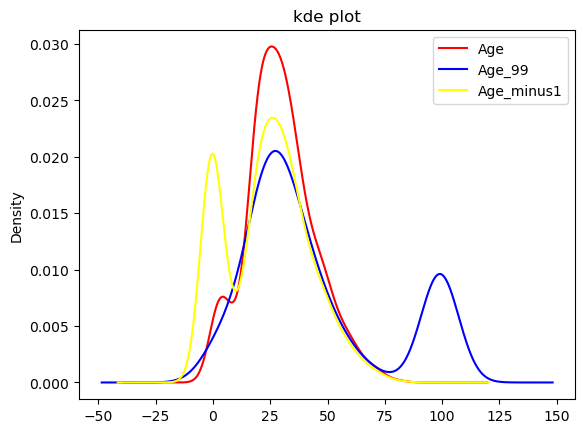

In [220]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train["Age"].plot(kind="kde",color="red",ax=ax)
x_train["Age_99"].plot(kind="kde",color="blue",ax=ax)
x_train["Age_minus1"].plot(kind="kde",color="yellow",ax=ax)
plt.title("kde plot")

#add legen
line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc="best")

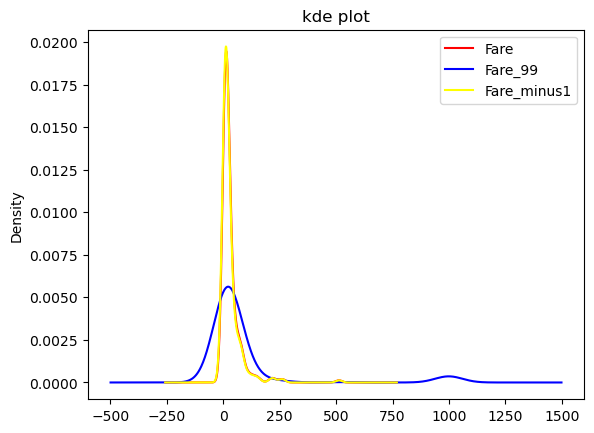

In [221]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train["Fare"].plot(kind="kde",color="red",ax=ax)
x_train["Fare_99"].plot(kind="kde",color="blue",ax=ax)
x_train["Fare_minus1"].plot(kind="kde",color="yellow",ax=ax)
plt.title("kde plot")

line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc="best")

In [222]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,213.716509,84.480223,-6.393469,213.716509,213.716509,87.899997,79.287836
Fare,84.480223,2574.352621,17.050423,-49.762911,119.548363,2574.352621,2574.352621
Family,-6.393469,17.050423,2.770177,-5.506430,-4.956484,6.685344,16.435815
Age_99,213.716509,-49.762911,-5.506430,934.124958,-167.301760,-202.695108,-41.740249
Age_minus1,213.716509,119.548363,-4.956484,-167.301760,321.668811,191.737330,110.313200
Fare_99,87.899997,2574.352621,6.685344,-202.695108,191.737330,50926.922924,784.183690
Fare_minus1,79.287836,2574.352621,16.435815,-41.740249,110.313200,784.183690,2489.213857


In [223]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.106334,-0.295318,1.000000,1.000000,0.025986,0.102325
Fare,0.106334,1.000000,0.198661,-0.031926,0.130702,1.000000,1.000000
Family,-0.295318,0.198661,1.000000,-0.108247,-0.166041,0.017799,0.197928
Age_99,1.000000,-0.031926,-0.108247,1.000000,-0.305206,-0.029388,-0.027373
Age_minus1,1.000000,0.130702,-0.166041,-0.305206,1.000000,0.047373,0.123280
Fare_99,0.025986,1.000000,0.017799,-0.029388,0.047373,1.000000,0.069649
Fare_minus1,0.102325,1.000000,0.197928,-0.027373,0.123280,0.069649,1.000000


In [224]:
print("age var",x_train["Age"].var())
print("age_99 var",x_train["Age_99"].var())
print("age_minus1",x_train["Age_minus1"].var())

print("Fare var",x_train["Fare"].var())
print("Fare_99 var",x_train["Fare_99"].var())
print("Fare_minus1 var",x_train["Fare_minus1"].var())


age var 213.7165085187578
age_99 var 934.1249575238237
age_minus1 321.6688109349075
Fare var 2574.3526206637193
Fare_99 var 50926.922924304854
Fare_minus1 var 2489.2138573159036


- with the help of machine learning

In [227]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [228]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Survived"]),df["Survived"],test_size=0.2,random_state=0)

In [230]:
x_train.shape

(712, 3)

In [233]:
y_train.shape

(712,)

In [239]:
# here we have to give strategy and fill_value which we want to fill
st1=SimpleImputer(strategy="constant",fill_value=99)
st2=SimpleImputer(strategy="constant",fill_value=999)

In [242]:
trf=ColumnTransformer(transformers=[
    ("first",st1,["Age"]),
    ("second",st2,["Fare"])
],remainder="passthrough")

In [243]:
trf.fit(x_train)

,transformers,"[('first', ...), ('second', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [253]:
trf.named_transformers_["first"].statistics_

array([99.])

In [255]:
trf.named_transformers_["second"].statistics_

array([999.])

In [245]:
x_train_transform=trf.transform(x_train)
x_test_transform=trf.transform(x_test)

In [246]:
x_train_transform

array([[99.    , 15.2458,  2.    ],
       [31.    , 10.5   ,  0.    ],
       [31.    , 37.0042,  2.    ],
       ...,
       [99.    ,  7.7333,  0.    ],
       [36.    , 17.4   ,  1.    ],
       [60.    , 39.    ,  2.    ]], shape=(712, 3))

,Age,Fare,Family
140,NaN,15.2458,2
439,31.0,10.5000,0
817,31.0,37.0042,2
378,20.0,NaN,0
491,21.0,7.2500,0
...,...,...,...
835,39.0,83.1583,2
192,19.0,7.8542,1
629,NaN,7.7333,0
559,36.0,17.4000,1


# End of distribution

- you can see in the notebook why i have fill value with this

<Axes: ylabel='Density'>

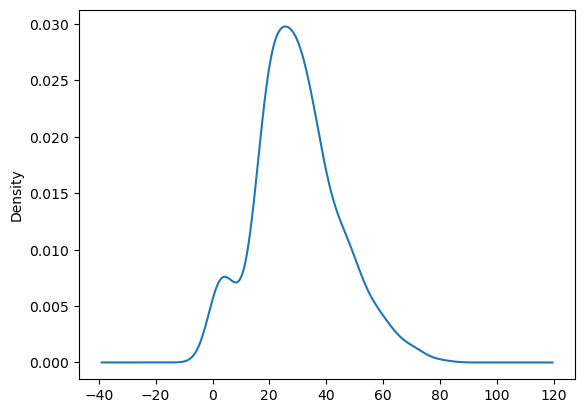

In [262]:
x_train["Age"].plot(kind="kde")

In [257]:
st=SimpleImputer(strategy="constant",fill_value=np.mean(x_train["Age"])+np.std(x_train["Age"]))

In [268]:
age_fill=st.fit_transform(x_train["Age"].to_frame())

In [269]:
age_fill

array([[44.3514231],
       [31.       ],
       [31.       ],
       [20.       ],
       [21.       ],
       [45.5      ],
       [22.       ],
       [44.3514231],
       [44.3514231],
       [26.       ],
       [25.       ],
       [21.       ],
       [31.       ],
       [15.       ],
       [44.3514231],
       [44.3514231],
       [65.       ],
       [44.3514231],
       [ 1.       ],
       [34.       ],
       [49.       ],
       [18.       ],
       [44.3514231],
       [70.       ],
       [14.       ],
       [19.       ],
       [30.       ],
       [31.       ],
       [32.       ],
       [16.       ],
       [50.       ],
       [24.       ],
       [56.       ],
       [ 7.       ],
       [ 9.       ],
       [33.       ],
       [19.       ],
       [32.5      ],
       [ 1.       ],
       [45.       ],
       [44.3514231],
       [19.       ],
       [21.       ],
       [ 4.       ],
       [28.       ],
       [17.       ],
       [30.       ],
       [22.  